# Development of regression model to predict car prices

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import pickle
import seaborn as sns
from cleaning import clean

In [3]:
df_cars_raw_ = pd.read_csv('cars.csv',sep=';',index_col=0)

In [4]:
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">href</a>'.format(val)

def df_with_href(df):
    return df.style.format({'href': make_clickable})

def df_pretty(df):
    columns = ['header', 'href', 'place', 'price','predicted price', 'price rating',
               'Miltal','Modellår','Tillverkningsår']
    return df_with_href(df = df[columns])

In [5]:
df_cars_raw = clean(df_cars_raw_)

In [6]:
df_cars_raw.describe()

,Hästkrafter,Miltal,Modellår,Tillverkningsår,price
count,524.000000,599.000000,594.000000,595.000000,599.000000
mean,93.812977,7487.971619,2014.356902,2014.067227,127958.479132
std,15.260496,8220.545588,5.057567,4.980993,83505.686989
min,47.000000,0.000000,1997.000000,1996.000000,999.000000
25%,89.000000,1.000000,2012.000000,2012.000000,54900.000000
50%,92.000000,5894.000000,2015.000000,2015.000000,118000.000000
75%,102.000000,12808.250000,2019.000000,2018.000000,199875.000000
max,149.000000,47499.500000,2019.000000,2019.000000,369900.000000


In [7]:
index = ((df_cars_raw['Miltal'] < 50000) & 
         (df_cars_raw['Miltal'] > 1000) & 
         (df_cars_raw['price'] > 4000))
df_cars = df_cars_raw.loc[index].copy()

In [8]:
df_cars.describe()

,Hästkrafter,Miltal,Modellår,Tillverkningsår,price
count,351.000000,361.000000,361.000000,361.000000,361.000000
mean,90.709402,12146.547091,2011.770083,2011.498615,75910.592798
std,13.647015,7177.833775,4.531347,4.461019,52852.564308
min,47.000000,1200.000000,1997.000000,1996.000000,4500.000000
25%,89.000000,6800.000000,2009.000000,2009.000000,35000.000000
50%,89.000000,10749.500000,2013.000000,2013.000000,69900.000000
75%,99.000000,16249.500000,2015.000000,2015.000000,99900.000000
max,149.000000,47499.500000,2019.000000,2018.000000,349900.000000


/Users/martinalexandersson/Dev/blocket/venv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


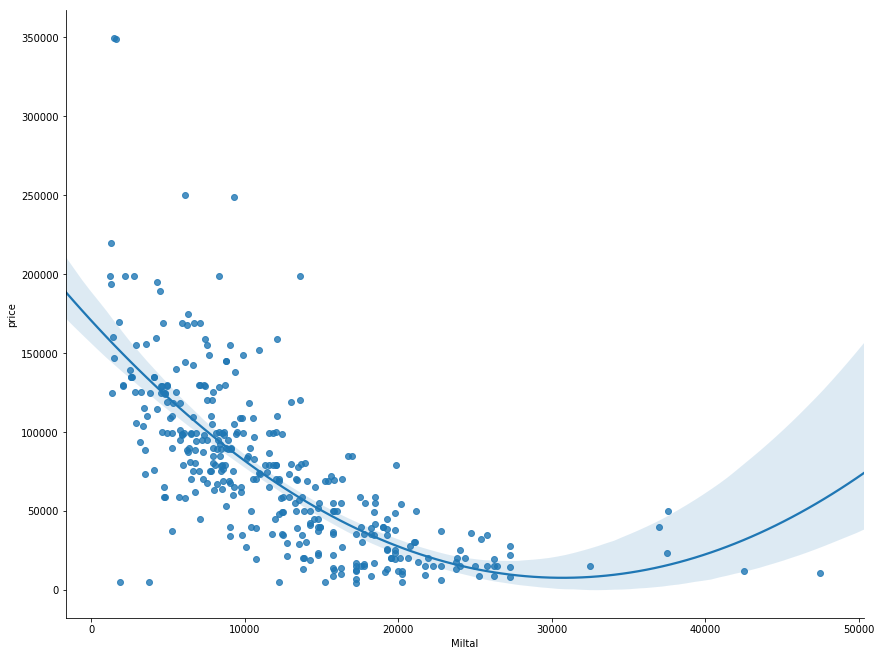

In [9]:
a = sns.lmplot(x="Miltal", y="price", data=df_cars,order=2)
a.fig.set_size_inches(15,10)

In [10]:
linear_regression = LinearRegression()

In [11]:
y = df_cars['price']
#feature_colums = ['Miltal','Modellår','Tillverkningsår','Hästkrafter']
feature_colums = ['Miltal','Modellår','Tillverkningsår']
X = df_cars[feature_colums].copy()
X.dropna(axis = 1,inplace = True)

/Users/martinalexandersson/Dev/blocket/venv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


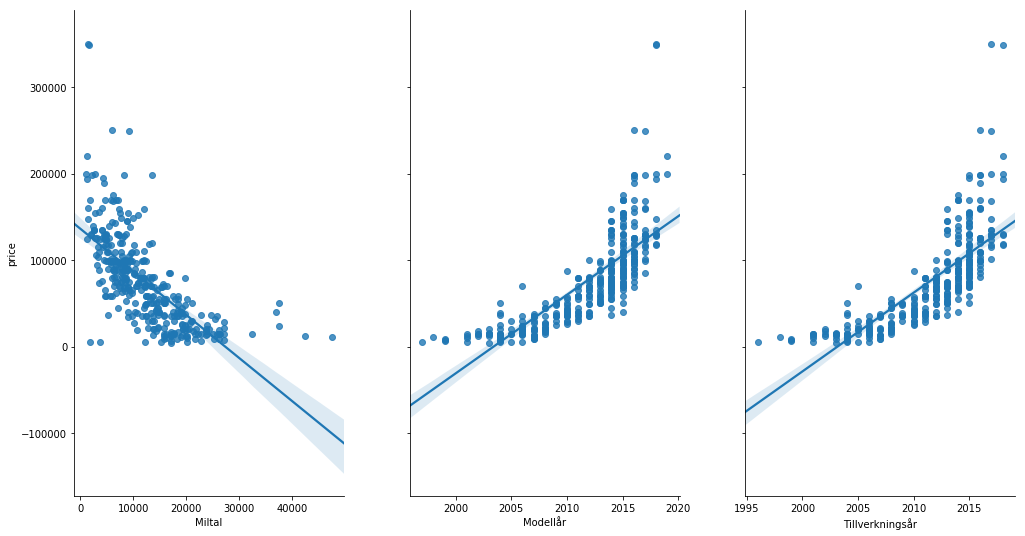

In [12]:
a = sns.pairplot(data = df_cars,x_vars = feature_colums,y_vars=['price'],kind = 'reg',)
a.fig.set_size_inches(15,10)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [14]:
degree = 2
model = make_pipeline(PolynomialFeatures(degree), linear_regression)

r2s = []
for i in range(20):

    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    r2 = r2_score(y_test, y_predict)
    r2s.append(r2)
np.mean(r2s)

/Users/martinalexandersson/Dev/blocket/venv/lib/python3.5/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


0.7093060520379495

In [15]:
model.fit(X, y)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [16]:
pickle.dump(model, open('model.pkl', 'wb'))

In [17]:
df_cars['predicted price'] = model.predict(df_cars[feature_colums])
df_cars['price rating'] = df_cars['price'] / df_cars['predicted price']

In [18]:
df_with_href(df_cars.sort_values(by = 'price rating'))

,Biltyp,Bränsle,CO2-utsläpp,Drivhjul,Färg,Hästkrafter,I trafik,Miltal,Modell,Modellår,Märke,Tillverkningsår,Växellåda,car type,header,href,place,price,predicted price,price rating
86741931,nan,Diesel,nan,nan,nan,nan,nan,1886,nan,2006,nan,2006,Manuell,berlingo,"Citroën Berlingo 1,9 D -06",href,Värmland,5000,33741.1,0.148187
86775174,Kombi,Bensin,-,Tvåhjulsdriven,Ljusbrun,108,2005-07-06,15249.5,BERLINGO FA 1.6I,2005,Citroën,2005,Manuell,berlingo,"Citroen Berlingo Family 1,6 -05",href,Stockholm,5000,16519.9,0.302665
86786219,Kombi,Bensin,-,Tvåhjulsdriven,Vit,74,1996-04-23,3749.5,"VW CADDY SKÅP 1,6",1997,Volkswagen,1996,Manuell,caddy,Caddy -97,href,Södermanland,5000,16135.7,0.309871
85950473,Yrkesfordon,Bensin,-,Tvåhjulsdriven,Vit,74,1999-08-04,22749.5,"BERLINGO SKÅP 1,",1999,Citroën,1999,Manuell,berlingo,Citroen Berlingo skåp -99,href,Stockholm,6000,18495.8,0.324398
86344426,-,Diesel,-,Tvåhjulsdriven,Röd,69,1999-06-08,27249.5,"BERLINGO SKÅP 1,",1999,Citroën,1999,Manuell,berlingo,Citroen berlingo -99,href,Jämtland,8000,24626.1,0.324859
86419149,-,Diesel,-,Tvåhjulsdriven,Vit,89,2004-07-29,47499.5,BERLINGO SK HDI,2004,Citroën,2004,Manuell,berlingo,Citroen berlingo -04,href,Göteborg,10500,29987.1,0.350151
86186346,-,Diesel,-,Tvåhjulsdriven,Silver,69,2004-11-03,20249.5,"BERLINGO SK 1,9D",2004,Citroën,2004,Manuell,berlingo,Citroën Berlingo - renoveringsobjekt -04,href,Skaraborg,4900,13024.8,0.376204
86450741,Kombi,Diesel,-,Tvåhjulsdriven,Silver,89,2010-11-15,16249.5,G*9HX* BERLINGO,2007,Citroën,2006,Manuell,berlingo,"Citroen Berlingo 1,6 HDI multispace -07",href,Landskrona,9900,26044.7,0.380116
86745538,Kombi,Bensin,-,Tvåhjulsdriven,Ljusblå,108,2003-07-14,17249.5,BERLINGO FA 1.6,2003,Citroën,2003,Manuell,berlingo,Citroen berlingo -03,href,Västmanland,4500,11625.9,0.387068
86219343,Kombi,Diesel,-,Tvåhjulsdriven,Vit,84,2006-12-18,18249.5,FC KANGOO,2007,Renault,2007,Manuell,kangoo,Kangoo 1.5dci Skåp Drag Kamrem bytt -07,href,Jämtland,8500,21770.1,0.390444


In [19]:
df_cars['car type'].unique()

array(['berlingo', 'kangoo', 'caddy'], dtype=object)

In [20]:
degree = 2
kangoo_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
index = df_cars['car type'] == 'kangoo'
df_kangoo = df_cars.loc[index].copy()

r2s = []
for i in range(20):

    kangoo_model.fit(X_train, y_train)
    y_predict = kangoo_model.predict(X_test)
    r2 = r2_score(y_test, y_predict)
    r2s.append(r2)
np.mean(r2s)


0.7093060520379495

In [21]:
kangoo_model.fit(df_kangoo[feature_colums],df_kangoo['price'])

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [22]:
df_kangoo['predicted price'] = model.predict(df_kangoo[feature_colums])
df_kangoo['price rating'] = df_kangoo['price'] / df_kangoo['predicted price']
df_with_href(df_kangoo.sort_values(by = 'price rating'))

,Biltyp,Bränsle,CO2-utsläpp,Drivhjul,Färg,Hästkrafter,I trafik,Miltal,Modell,Modellår,Märke,Tillverkningsår,Växellåda,car type,header,href,place,price,predicted price,price rating
86219343,Kombi,Diesel,-,Tvåhjulsdriven,Vit,84,2006-12-18,18249.5,FC KANGOO,2007,Renault,2007,Manuell,kangoo,Kangoo 1.5dci Skåp Drag Kamrem bytt -07,href,Jämtland,8500,21770.1,0.390444
86781282,Kombi,Diesel,-,Tvåhjulsdriven,Vit,103,2008-11-14,13868,W KANGOO,2008,Renault,2008,Manuell,kangoo,Renault Kangoo II 1.5 dCi FAP (105hk) -08,href,Göteborg,20000,31064.9,0.643813
86781281,Kombi,Miljöbränsle/Hybrid,-,Tvåhjulsdriven,Vit,106,2009-09-10,12403,W KANGOO,2009,Renault,2009,Manuell,kangoo,Renault Kangoo II 1.6 E85 (105hk) -09,href,Göteborg,35000,39330.8,0.889889
86650834,Kombi,Diesel,119 g/km,Tvåhjulsdriven,Vit,89,2014-05-27,6800,W KANGOO,2014,Renault,2014,Manuell,kangoo,"Renault Kangoo 1,5 dCi Family 5-Sits -14",href,Dalarna,99500,98063.4,1.01465
85898470,Kombi,Diesel,111 g/km,Tvåhjulsdriven,Brun (Brun Mocca Metallic Cnb),89,2014-10-31,7862,W KANGOO,2015,Renault,2014,Manuell,kangoo,Renault Kangoo II Kombi phII dCi 90FAP S/S St -15,href,Ystad,119900,111383,1.07647
85940933,Kombi,Diesel,-,Tvåhjulsdriven,Vit,85,2011-06-20,16249.5,W KANGOO,2011,Renault,2011,Manuell,kangoo,Hundbil/gods -11,href,Västerbotten,55000,46985.6,1.17057
81401493,Kombi,Diesel,-,Tvåhjulsdriven,Vit,89,2013-09-27,11600,W KANGOO,2014,Renault,2014,Manuell,kangoo,Renault Kangoo Express Maxi 5sits 1.5 dCi 90h -14,href,Jämtland,99000,84434.4,1.17251
83751407,Kombi,Diesel,-,Tvåhjulsdriven,Vit,89,2014-04-02,7515,W KANGOO,2014,Renault,2014,Manuell,kangoo,"Renault Kangoo 1,5 Dci 90 Hk Style Family 5d -14",href,Dalarna,119900,95965,1.24941
86463241,Kombi,Diesel,-,Tvåhjulsdriven,Vit,89,2013-07-25,10600,W KANGOO,2013,Renault,2013,Manuell,kangoo,Renault Kangoo Express Maxi 1.5 dCi 90hk 5sit -13,href,Jämtland,97000,76729.2,1.26419
86785905,Kombi,Bensin,163 g/km,Tvåhjulsdriven,Röd,74,2005-11-11,26249.5,KC KANGOO,2006,Renault,2005,Manuell,kangoo,"Ranault Kangoo Family 1,2 i ny-bes -06",href,Kronoberg,19500,11751.6,1.65935


In [23]:
index = df_kangoo['header'] == 'Renault Kangoo 1,5 (6 växlad) -08'
df_kangoo.loc[index]

,Biltyp,Bränsle,CO2-utsläpp,Drivhjul,Färg,Hästkrafter,I trafik,Miltal,Modell,Modellår,Märke,Tillverkningsår,Växellåda,car type,header,href,place,price,predicted price,price rating


In [24]:
index = df_kangoo['header'] == 'Renault Kangoo 1.6|5-Sits|6800Mil|Fullservad -09'
df_kangoo.loc[index]



,Biltyp,Bränsle,CO2-utsläpp,Drivhjul,Färg,Hästkrafter,I trafik,Miltal,Modell,Modellår,Märke,Tillverkningsår,Växellåda,car type,header,href,place,price,predicted price,price rating


In [25]:
df_cars.head()

,Biltyp,Bränsle,CO2-utsläpp,Drivhjul,Färg,Hästkrafter,I trafik,Miltal,Modell,Modellår,Märke,Tillverkningsår,Växellåda,car type,header,href,place,price,predicted price,price rating
71203995,-,Diesel,-,Tvåhjulsdriven,Vit,69.0,2006-12-20,14000.0,BERLINGO 1.9D,2007.0,Citroën,2006.0,Manuell,berlingo,"Citroën Berlingo 1,9D (70 hk) Skåp -07",https://www.blocket.se/goteborg/Citroen_Berlin...,Göteborg,29900.0,29601.619127,1.010080
72129083,Kombi,Diesel,-,Tvåhjulsdriven,Vit,99.0,2015-09-08,2900.0,BERLINGO,2015.0,Citroën,2015.0,Manuell,berlingo,Citroën Berlingo Multispace Blue HDI 100 FEEL -15,https://www.blocket.se/jonkoping/Citroen_Berli...,Jönköping,154900.0,122890.299510,1.260474
76934951,Yrkesfordon,Diesel,-,Tvåhjulsdriven,Vit,74.0,2013-11-07,12900.0,7 BERLINGO,2014.0,Citroën,2013.0,Manuell,berlingo,Citroën Berlingo HDI skåp -14,https://www.blocket.se/stockholm/Citroen_Berli...,Stockholm,59000.0,82753.880554,0.712958
77547592,Yrkesfordon,Diesel,-,Tvåhjulsdriven,Vit,89.0,2014-11-12,4100.0,7 BERLINGO,2014.0,Citroën,2014.0,Manuell,berlingo,Citroën BERLINGO PRO PACK 92 HDI -14,https://www.blocket.se/varmland/Citroen_BERLIN...,Värmland,75600.0,106202.843219,0.711845
77809941,Kombi,Diesel,-,Tvåhjulsdriven,Silver,92.0,2013-12-16,6600.0,7 BERLINGO,2014.0,Citroën,2013.0,Automat,berlingo,"Citroën Berlingo Family III 1,6 HDI -14",https://www.blocket.se/varmland/Citroen_Berlin...,Värmland,109500.0,104480.298389,1.048044


In [26]:
index = ((df_cars['Biltyp'] == 'Kombi') & 
         (df_cars['Miltal'] < 15000) &
         (df_cars['Tillverkningsår'] > 2007) &
         
         (~df_cars['header'].str.contains('Skåp')) & 
         (~df_cars['header'].str.contains('SKÅP')) &
         (~df_cars['header'].str.contains('HDi')) &
         (~df_cars['header'].str.contains('HDI')) &
         (~df_cars['header'].str.contains('Hdi')) &
         
         
         (~df_cars['header'].str.contains('TDI')) &
         
         (~df_cars['header'].str.contains('SÅLD')) 
         
         
         
        
        )
df_selected = df_cars.loc[index]

df_pretty(df_selected.sort_values(by = 'price rating'))

,header,href,place,price,predicted price,price rating,Miltal,Modellår,Tillverkningsår
86781282,Renault Kangoo II 1.5 dCi FAP (105hk) -08,href,Göteborg,20000,31064.9,0.643813,13868,2008,2008
86781281,Renault Kangoo II 1.6 E85 (105hk) -09,href,Göteborg,35000,39330.8,0.889889,12403,2009,2009
86739660,Volkswagen Caddy MPV 2.0 EcoFuel (109hk) -15,href,Stockholm,105000,106736,0.983738,7873,2015,2015
86650834,"Renault Kangoo 1,5 dCi Family 5-Sits -14",href,Dalarna,99500,98063.4,1.01465,6800,2014,2014
86764408,"Va Caddy 1,9 tdi -10",href,Värmland,48000,46734.4,1.02708,12249.5,2010,2010
84459965,Citroën Berlingo Multispace 5sitts -14,href,Gävleborg,94900,91999.6,1.03153,8889,2014,2014
85898470,Renault Kangoo II Kombi phII dCi 90FAP S/S St -15,href,Ystad,119900,111383,1.07647,7862,2015,2014
85789234,Volkswagen Caddy Life 2.0 EcoFuel Drag S&V-hj -15,href,Uppsala,128800,117199,1.09899,4612,2015,2015
86642772,Citroën Berlingo XTR 120 Hk 6vx -16,href,Skaraborg,155900,141194,1.10416,3549,2016,2015
84561043,Citroën Berlingo Multispace 1.2 PureTech Euro -19,href,Västmanland,219900,196305,1.1202,1250,2019,2018
